## PHYS 249 Lab \#12: Ballistics $-$  Physicists of the Carribean

### For full marks, answer part a, part b, and *one* of parts c,d,e or f



References:
https://www.arc.id.au/Cannonballs.html

https://www.sciencedirect.com/science/article/pii/S2214914715000835

https://www.military-history.org/fact-file/the-broadside.htm

https://en.wikipedia.org/wiki/32-pounder_gun


Consider the following problem: a cannon on the deck of a pirate ship is about 3m off the water, and fires a (looted) standard issue British naval 32lb (14.5 kg) ball, with a diameter of 6.1" (15.5 cm)$^*$. With a standard charge of gunpowder (1/3 the mass of the ball), the muzzle velocity is 300m/s. For purposes of drag, the weather is mild, with a temperature of 20 $^\circ$C.

The code below calculates the motion of the ball, including the effects of gravitational acceleration, *and* drag from air resistance. The latter produces a *drag force*

$$F_D = -\alpha \vec{V}$$

where $\vec{V}$ is the velocity, $\alpha = 1/2(\rho\,V\,C_D\,A$), $\rho$ is the density of air, $A$ is the cross-sectional area of the projectile, and $C_D$ is the drag coefficient.


* technically, this makes it a 17-th century "demi-cannon"


maximum range:  2418.1296672223025 m


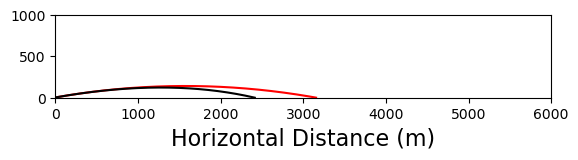

In [5]:
from numpy import array, arange
from matplotlib.pyplot import plot, show, gca, rcParams, xlim, ylim, xlabel
from math import pi, cos, sin, sqrt

ax = gca()
ax.set_aspect('equal')
rcParams['figure.figsize'] = [20, 20]

rho = 1.204     #density of air in kg/m^3, at 1atm and 20C
m = 14.5        #projectile mass in kg
diam = 0.155    #cannonball diameter in m
v0 = 300       #muzzle velocity, in m/s
CD = 0.2       #drag coefficient for a low velocity spherical projectile
A = pi*(diam*diam/4.0) #projectile cross-sectional area
g = 9.81        # grav. accel. in m/s/s

theta = 10.0 #gun angle from horizontal

#initial conditions
x0 = 0.0
y0 = 3.0
vx0 = v0*cos(theta/180.0*pi)
vy0 = v0*sin(theta/180.0*pi)

# given a state vector r = (x,y,z) and a time t, this function calculates 
# the derivative vector dr/dt = (dx/dt,dy/dt,dvx/dt,dvy/dt)
# this version includes gravity only
def f(r,t):
    x = r[0]
    y = r[1]
    vx = r[2]
    vy = r[3]
    v = sqrt(vx*vx +vy*vy) 
    FDoV = 0.5*rho*v*CD*A
    ax = 0.0
    ay = - g
    return array([vx,vy,ax,ay],float)

# this version includes drag forces as well
def f2(r,t):
    x = r[0]
    y = r[1]
    vx = r[2]
    vy = r[3]
    v = sqrt(vx*vx +vy*vy) 
    FDoV = 0.5*rho*v*CD*A
    ax = -FDoV*vx/m
    ay = -FDoV*vy/m - g
    return array([vx,vy,ax,ay],float)


# these arrays store *all* the values of t,x,y,z we go through as we integrate
a = 0.0
b = 20.0
N = 1000.0
h = (b-a)/N

tpoints = arange(a,b,h)
t2points = []
xpoints = []
ypoints = []
vxpoints = []
vypoints = []

# this array stores the state of the point (x(t),y(t),vx(t),vy(t)) as we advance t
r = array([x0,y0,vx0,vy0],float)

# code to solve the DEs
for t in tpoints:
    if r[1] > 0:
        xpoints.append(r[0])
        ypoints.append(r[1])
        vxpoints.append(r[2])
        vypoints.append(r[3])
        t2points.append(t)
        r += h*f(r,t)
        t += h
    else:
        break

plot(xpoints,ypoints,"r-") #drag free version


# this array stores the state of the point (x(t),y(t),vx(t),vy(t)) as we advance t
r = array([x0,y0,vx0,vy0],float)

tpoints = arange(a,b,h)
t2points = []
xpoints = []
ypoints = []
vxpoints = []
vypoints = []

# code to solve the DEs
for t in tpoints:
    if r[1] > 0:
        xpoints.append(r[0])
        ypoints.append(r[1])
        vxpoints.append(r[2])
        vypoints.append(r[3])
        t2points.append(t)
        r += h*f2(r,t) #version with drag
        t += h
    else:
        break
       
print("maximum range: ", r[0], "m")
plot(xpoints,ypoints,"k-")  #version with drag
xlim(0,6000)
ylim(0,1000)
xlabel("Horizontal Distance (m)",fontsize = 16)
show()



**a)** How far does the ball go horizontally before it hits the water, as a function of $\theta$ the tilt of the cannon from horizontal?



**b)** Repeat this calculation for muzzle velocities of 200 and 400 m/s (note the assumption of a constant drag coefficient is unrealistic over this range, but we'll ignore that).



**c)** Repeat the calculation for a 42 lb, 6.68" ball and a muzzle velocity of 250 m/s, as well as an 18lb, 5.04" ball, with a muzzle velocity of 400 m/s. What is the kinetic energy in each case, when the balls hit the water?



**d)** For the original problem, what is the ratio of the horizontal distance travelled considering air resistance, to the distance travelled neglecting air resistance, as a function of gun angle?




**e)** Finally, you can compare the initial results to those calculated using the numbers in the last two references below - 32-pounders were placed 2m above the water line, and fired with muzzle velocities of up to 487m/second.



**f)** Rewrite the code using the RK4 integration method; compare the accuracy for the initial case, with $N = 1000$ for Euler vs $N = 100$ for RK4. The code you will need is:

k1 = h*f(x,t)

k2 = h*f(x + k1/2, t + h/2)

k3 = h*f(x + k2/2, t + h/2)

k4 = h*f(x + k3, t + h)

x += (k1 + 2*k2 + 2*k3 + k4)/6

(see unit 19.)


**g)** Other ideas: what angle minimizes travel time?
        What mass maximizes range?
